In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
 
# reflect the tables
base.prepare(engine, reflect=False)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measurement = base.classes.measurement
station =  base.classes.measurement

In [12]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

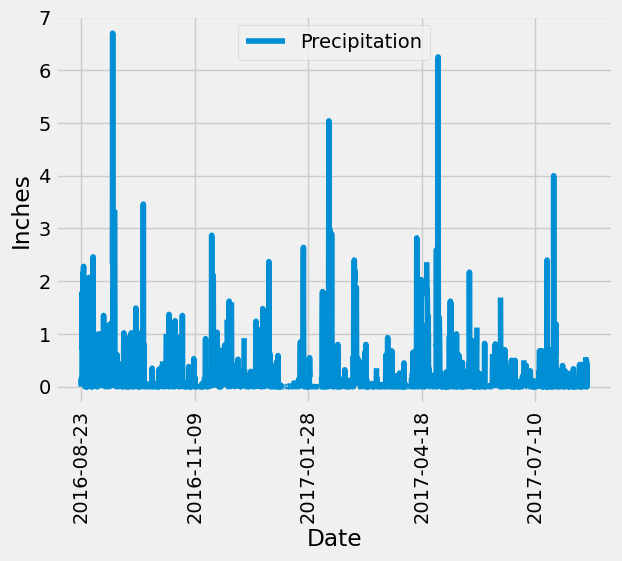

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

recentdata = dt.date(2017,8,23)

# Calculate the date one year from the last date in data set.

Julianyear = recentdata-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip_scores = [measurement.date, measurement.prcp]
precip_data = session.query(*precip_scores).filter(measurement.date >=Julianyear ).order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

precip_results = pd.DataFrame(precip_data, columns=["Date", "Precipitation"])

# Sort the dataframe by date

precip_results = precip_results.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data

precip_results.plot(x="Date", y="Precipitation", rot=90)
plt.ylabel("Inches")
plt.show()

In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data

precip_results.describe()


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [27]:
# Design a query to calculate the total number of stations in the dataset

number_sta = session.query(func.count(func.distinct(station.station))).scalar()
number_sta

9

In [31]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

active_stations =session.query(measurement.station, func.count(measurement.station))\
                              .group_by(measurement.station)\
                              .order_by(func.count(measurement.station).desc())\
                              .all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

temperature = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
              filter(measurement.station == "USC00519281").all()
temperature

[(54.0, 85.0, 71.66378066378067)]

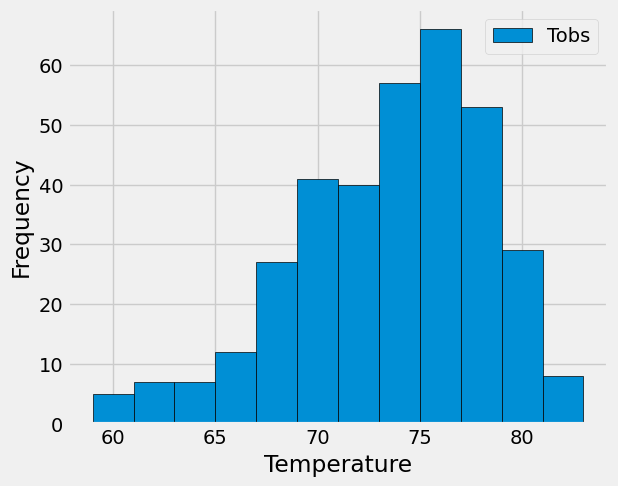

In [38]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results = session.query(measurement.tobs).filter(measurement.station=="USC00519281").\
    filter(measurement.date>=Julianyear ).all()
station_data = pd.DataFrame(results, columns=["Tobs"])
station_data.plot.hist(bins=12,edgecolor="black")
plt.tight_layout()
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.show()

# Close Session

In [35]:
# Close Session
session.close()